In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap as LCM
 

Text(0.5, 1.0, 'make_circles')

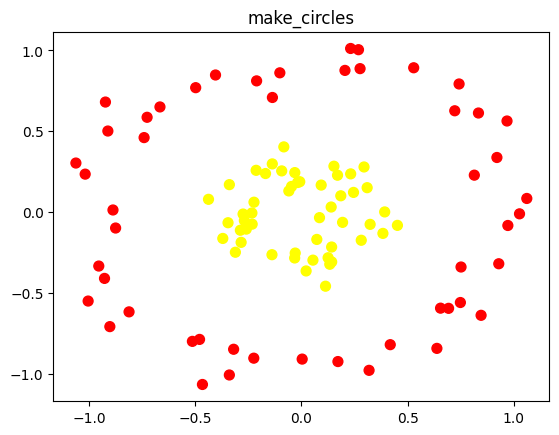

In [2]:
from sklearn.datasets._samples_generator import make_circles
X,y =make_circles(n_samples=100, noise=0.1, factor=0.3,shuffle=True, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')
plt.title('make_circles')

In [3]:

X_train,X_test,y_train,y_test =tts(X,y, test_size=0.2, random_state=1)


In [4]:
classifier = SVC(kernel='linear')

In [5]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

AS WE CAN SEE THAT THE MODEL ACCURACY IS MUCH MUCH LOWER THAN STANDARD WE NOW MOVE ON TO FIX THIS AND TRY OUT DIFFERENT WAYS

In [24]:

def decision_boundary_plot(X, y, model, title="DECISION BOUNDARY", cmap=('orange', 'green'), resolution=0.01):
    """
    Plots the decision boundary for a classifier in 2D.

    Parameters:
    - X: ndarray, shape (n_samples, 2) — Input features
    - y: ndarray, shape (n_samples,) — Target labels
    - model: trained classifier with a `.predict()` method
    - title: str — Title of the plot
    - cmap: tuple — Colors for the classes
    - resolution: float — Step size for the meshgrid
    """

    # CREATE A COLORMAP

    color_map = LCM(cmap)

    #DEFINE THE MESHGRID BOUNDARIES

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # PREDICT THE LABEL FOR EACH POINT IN THE GRID
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    z = model.predict(grid_points).reshape(xx.shape)

    # CREATE PLOT 
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, z, cmap=color_map, alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=color_map, edgecolors='k', s=60)
    plt.title(title)
    plt.xlabel("FEATURE 1")
    plt.ylabel("FEATURE 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

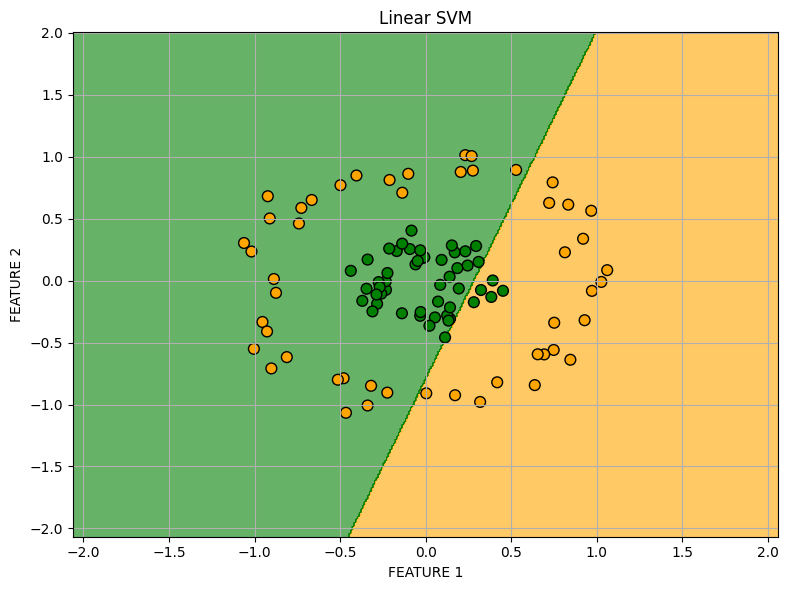

In [25]:
decision_boundary_plot(X, y, classifier, title="Linear SVM")



In [11]:
def plt_3d_plot(X,y):
    r =np.exp(-(X**2).sum(1))
    ax =plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax;


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

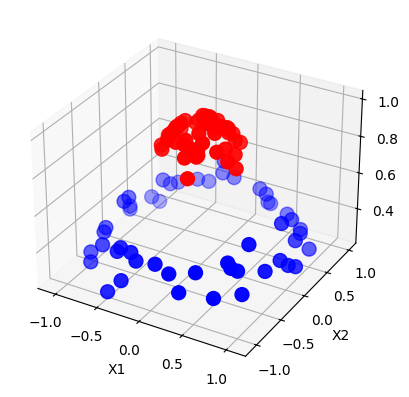

In [12]:
plt_3d_plot(X,y)

In [13]:
rbf_classifier =SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)
y_pred =rbf_classifier.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


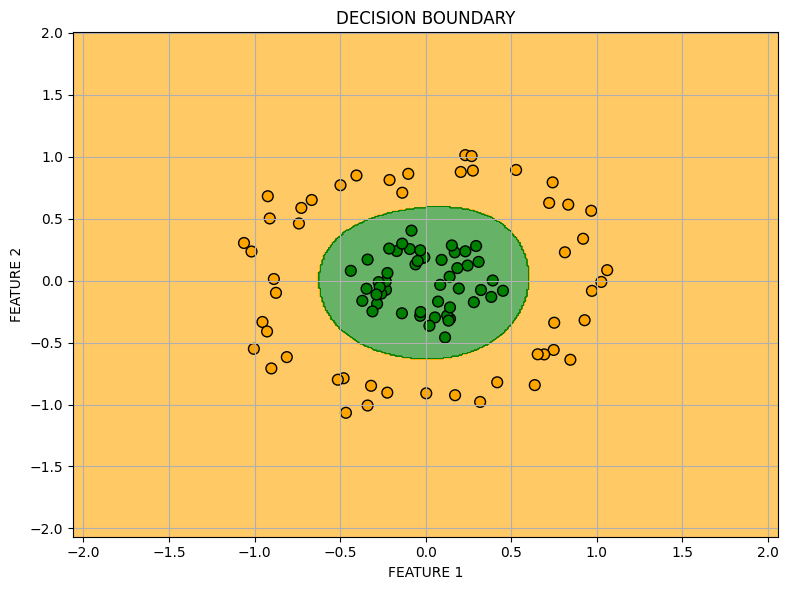

In [26]:
decision_boundary_plot(X,y,rbf_classifier)

In [16]:
poly_classifier=SVC(kernel='poly',degree=2)
poly_classifier.fit(X_train,y_train)
poly_y_pred=poly_classifier.predict(X_test)
poly_acc_score=accuracy_score(y_test,poly_y_pred)
print(poly_acc_score)

1.0


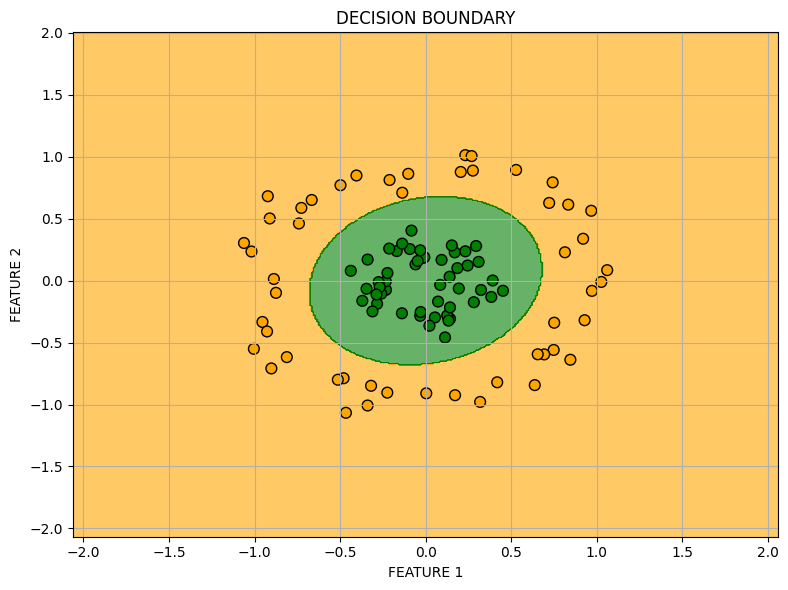

In [27]:
decision_boundary_plot(X,y,poly_classifier)